In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data
import seaborn as sns

# Data Acqusition Exercises

### Exercise 1
- Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
iris = sns.load_dataset('iris')
df_iris = pd.DataFrame(iris)

- A) print the first 3 rows

In [ ]:
df_iris.head(3)

- B) print the number of rows and columns (shape)

In [ ]:
df_iris.shape

- C) print the column names

In [ ]:
df_iris.columns

#df_iris.columns.to_list()

- D) print the data type of each column

In [ ]:
df_iris.info()
#df_iris.dtypes()

- E) print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris.describe().T

No, I would not recommend rescaling the data based on these statistics.

### Exercise 2
- Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name = 'Table1_CustDetails')

In [ ]:
df_excel.info()

- A) assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
df_excel_sample

- B) print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

- C) print the first 5 column names

In [ ]:
df_excel.columns[:5]

- D) Print the column names that have a data type of object.

In [ ]:
df_excel.dtypes[df_excel.dtypes == object]

- E) compute the range for each of the numeric variables.

In [ ]:
numeric_stats = df_excel.describe().T
numeric_stats['range'] = numeric_stats['max'] - numeric_stats['min']
numeric_stats

### Exercise 3

- Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [ ]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
df_google = pd.read_csv(csv_export_url)

- A) print the first 3 rows

In [ ]:
df_google.head(3)

- B) print the number of rows and columns

In [ ]:
df_google.shape

- C) print the column names

In [ ]:
df_google.columns

- D) print the data type of each column

In [ ]:
df_google.info()

#df_google.dtypes

- E) print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe().T

- F) print the unique values for each of your categorical variables


In [ ]:
df_google.select_dtypes(object).nunique()

In [ ]:
df_google.Sex.value_counts()

In [ ]:
df_google.Embarked.value_counts()

# Data Preparation Exercises

### Exercise 1: Iris Data
- A) Use the function defined in acquire.py to load the iris data.

In [ ]:
import acquire

In [4]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


- B) Drop the species_id and measurement_id columns.

In [ ]:
cols_to_drop = ['species_id']

iris_df = iris_df.drop(columns = cols_to_drop)
iris_df.head()

- C) Rename the species_name column to just species.

In [ ]:
iris_df = iris_df.rename(columns = {'species_name': 'species'})
iris_df.head()

- D) Create dummy variables of the species name.

In [ ]:
dummy_df = pd.get_dummies(iris_df['species'])
iris_df = pd.concat([iris_df, dummy_df], axis = 1)
iris_df.head()

- E) Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    cols_to_drop = ['species_id']
    df = df.drop(columns = cols_to_drop)
    df = df.rename(columns = {'species_name': 'species'})
    
    dummy_df = pd.get_dummies(df['species'])
    df = pd.concat([df, dummy_df], axis = 1)
    return df

In [ ]:
prep_iris(iris_df)

### Exercise 2: Titanic Data
- A) Use the function you defined in acquire.py to load the titanic data set.

In [2]:
import acquire

In [3]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


- B) Handle the missing values in the embark_town and embarked columns.

# Data Exploration Exercises


### Exercise 1: 
- Use the iris dataset. As always, add, commit, and push your changes. Split your data into train, test, and validate samples.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [5]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
train_validate, test = train_test_split(iris, test_size = .2,
                                       random_state = 123,
                                       stratify = iris.species)
train, validate = train_test_split(train_validate, test_size = .3,
                                  random_state = 123,
                                  stratify = train_validate.species)

In [7]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (84, 5)
validate -> (36, 5)
test -> (30, 5)


### Exercise 2:
- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [8]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [9]:
train_melt = train.melt(id_vars = 'species')
train_melt

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


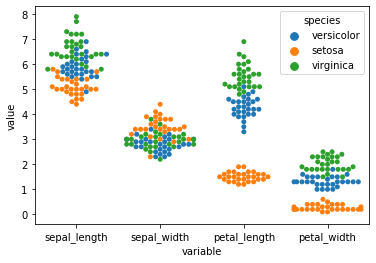

In [10]:
sns.swarmplot(data = train_melt, x = 'variable', y = 'value', hue = 'species')
plt.show()

__Takeaways__: 
- There is a fairly clear line in the difference between species petal length and species petal width
- The sepal length and sepal width is not so significant. 
- Sepal width specifically is intertwined within the other species that we would not be able to make any clear conclusions. 

### Exercise 3: 
- Create 4 subplots (2 rows x 2 columns) of scatterplots.
    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length
- What are your takeaways?

In [11]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [12]:
train['sepal_area'] = round(train.sepal_length * train.sepal_width, 1)
train['petal_area'] = round(train.petal_length * train.petal_width, 1)
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.8,3.5
36,5.5,3.5,1.3,0.2,setosa,19.2,0.3
133,6.3,2.8,5.1,1.5,virginica,17.6,7.6
95,5.7,3.0,4.2,1.2,versicolor,17.1,5.0
18,5.7,3.8,1.7,0.3,setosa,21.7,0.5


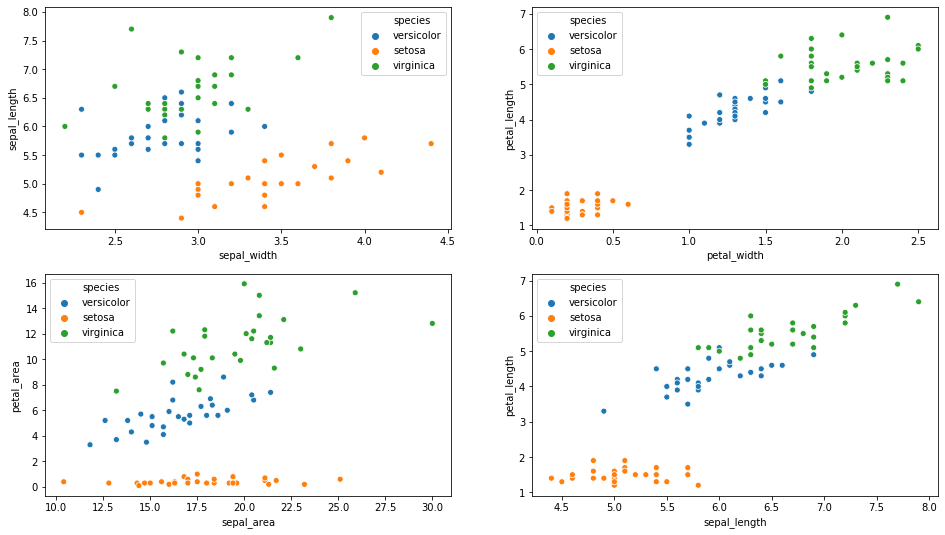

In [13]:
plt.figure(figsize=(16, 9))

plt.subplot(2, 2, 1)
sns.scatterplot(data = train, x = 'sepal_width', y = 'sepal_length', hue = 'species')

plt.subplot(2, 2, 2)
sns.scatterplot(data = train, x = 'petal_width', y = 'petal_length', hue = 'species')

plt.subplot(2, 2, 3)
sns.scatterplot(data = train, x = 'sepal_area', y = 'petal_area', hue = 'species')

plt.subplot(2, 2, 4)
sns.scatterplot(data = train, x = 'sepal_length', y = 'petal_length', hue = 'species')

plt.show()

__Takeaways__: 

- The scatterplot displaying sepal length vs sepal width does not seem to be a good determing factor for species because of the overlap between versicolor and virginica
- The other scatterplots seem to be a better identifier but there is some edge cases where we may predict versicolor or virginica incorrectly
- Lines can be drawn to distingiush between species on petal measurements than on sepal measurements

### Exercise 4: 
- Create a heatmap of each variable layering correlation coefficient on top.

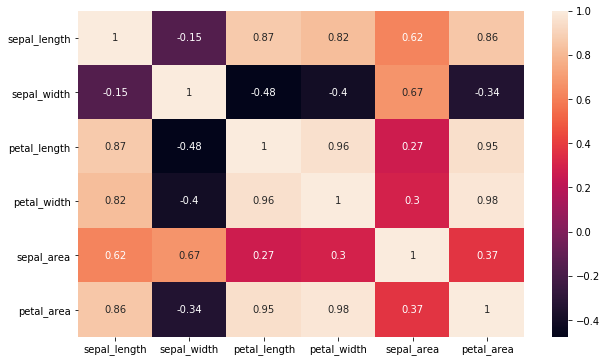

In [32]:
train_corr = train.corr()
plt.subplots(figsize = (10,6))
sns.heatmap(train_corr, annot = True)
plt.show()

### Exercise 5: 
- Create a scatter matrix visualizing the interaction of each variable

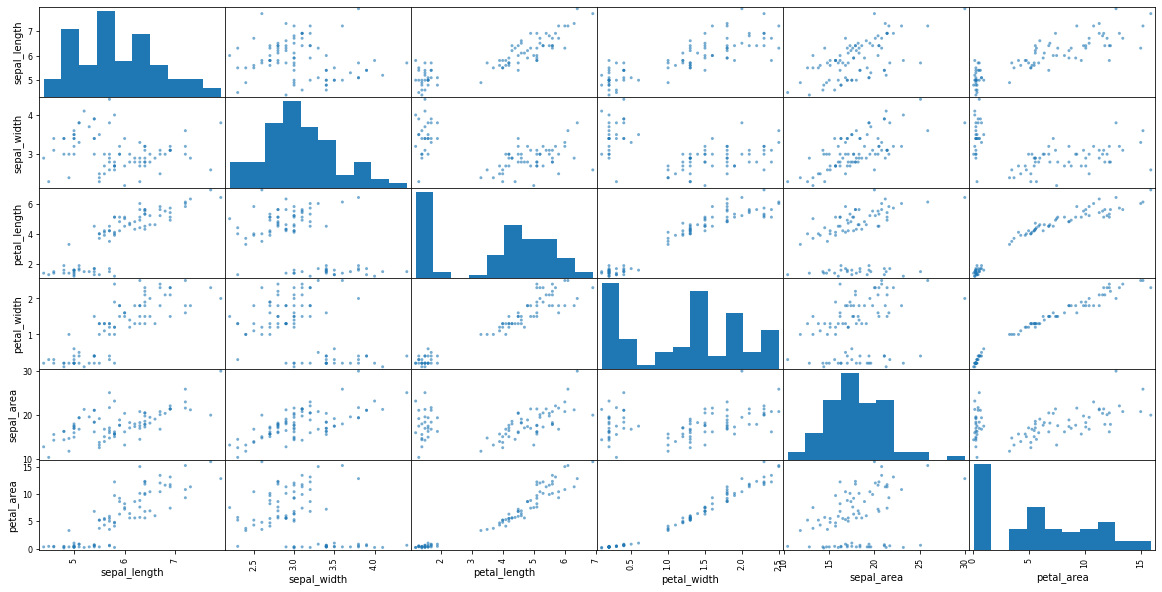

In [29]:
pd.plotting.scatter_matrix(train, figsize = (20, 10), alpha = .6)
plt.show()

### Exercise 6: 
- Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

In [33]:
train.groupby('species').sepal_length.var()

species
setosa        0.129881
versicolor    0.181098
virginica     0.283426
Name: sepal_length, dtype: float64

In [39]:
virginica_sep_len = train[train.species == 'virginica'].sepal_length
versicolor_sep_len = train[train.species == 'versicolor'].sepal_length

t, p = stats.ttest_ind(virginica_sep_len, versicolor_sep_len, equal_var = False)
t, p

(5.656491804882077, 6.856736413800083e-07)

- What is your takeaway from this statistical testing?

### Exercise 7: 
- Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.